## Applied - Question 8

The question involve Auto dataset - a data frame with 392 observations on the following 9 variables.
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 
The dataset was used in the 1983 American Statistical Association Exposition.
 1. mpg: miles per gallon
 2. cylinders: Number of cylinders between 4 and 8
 3. displacement: Engine displacement (cu. inches)
 4. horsepower: Engine horsepower
 5. weight: Vehicle weight (lbs.)
 6. acceleration: Time to accelerate from 0 to 60 mph (sec.)
 7. year: Model year (modulo 100)
 8. origin: Origin of car (1. American, 2. European, 3. Japanese)
 9. name: Vehicle name

### Import block

In [7]:
import pandas as pd
import os
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

import statsmodels.stats.api as sms

(a) Running the linear regression between mpg and horsepower

In [3]:
data_path = 'D:\\PycharmProjects\\ISLR\\data\\'
auto = pd.read_csv(f'{data_path}auto.csv', na_values='?').dropna()

# Convert horse power to numeric value
# auto = auto[pd.to_numeric(auto['horsepower'], errors='coerce').notnull()]
auto['horsepower'] = pd.to_numeric(auto['horsepower'])
mod = smf.ols('mpg ~ horsepower', data=auto)
reg = mod.fit()
print(reg.summary())

rss = np.sum(reg.resid**2)
rse = np.sqrt(rss/len(auto))
print(rse)

p = reg.get_prediction(exog=dict(horsepower=98))
print(p.summary_frame())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 15 Oct 2019   Prob (F-statistic):           7.03e-81
Time:                        23:10:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

(i) There is a relationship between mpg and horsepower. First, the observed F statistic is 
much bigger than 1 which rejects the null hypothesis. Secondly, the p-values for B0 is 
close to zero and thus, there is a statistically significant relationship between mpg and horsepower.  
(ii) The relationship is average. There is a 20% error with RSE = 4.9 and mean of mpg of about 23.4.
THe adjusted R-squared is also hover at 60% which means we can only explain 60% of the variance in mpg
through horsepower. 
(iii) The relationship is negative. Higher horsepower takes more fuel and decrease mpg. 
(iv)  As given above.

## Question 9
(a) Scatter plot matrix with seaborn

In [85]:
# sns.pairplot(data=auto)

(b) Correlation matrix

In [86]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


(c) Fitting multilinear regression

In [87]:
formula = '+'.join(auto.columns.drop(['mpg', 'name']))
mod = smf.ols(f'mpg~{formula}', data=auto)
model_fit = mod.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          2.04e-139
Time:                        23:07:07   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. There is a statistically significant relationship between mpg and other variables. F statistic
is much bigger than 1 with prob(F) very close to 0 indicates a rejection of null hypothesis.  
ii. Looking at the p-values for each predictors, the statistically significant ones are:
 1. displacement
 2. weight
 3. year
 4. origin  
 
iii. the coefficient of year is 0.7508 which suggests each year, on average, the mpg for all cars
will be increase by 0.7508. IE, cars are getting more efficient.

(d) Plotting 3 diagnostic plots. There will be a big chunk of code that I borrow from 
[this website](https://medium.com/@emredjan/emulating-r-regression-plots-in-python-43741952c034)

In [88]:
# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

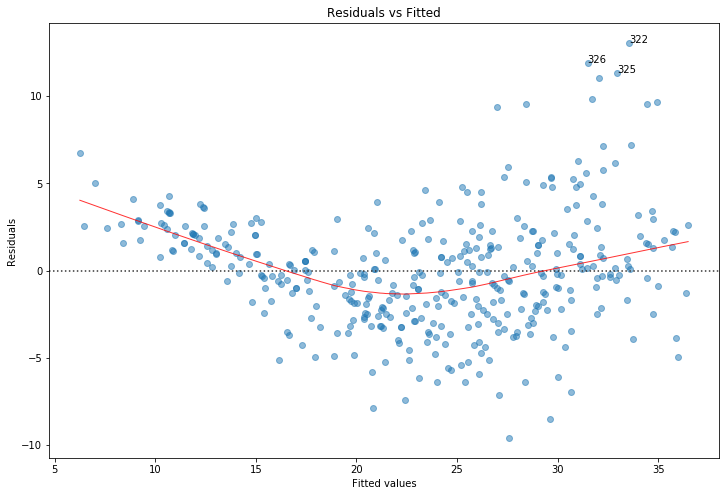

In [89]:
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'mpg', data=auto, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# annotations
abs_resid = model_abs_resid.sort_values(ascending=False)
abs_resid_top_3 = abs_resid[:3]

for i in abs_resid_top_3.index:
    plot_lm_1.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_residuals[i]))

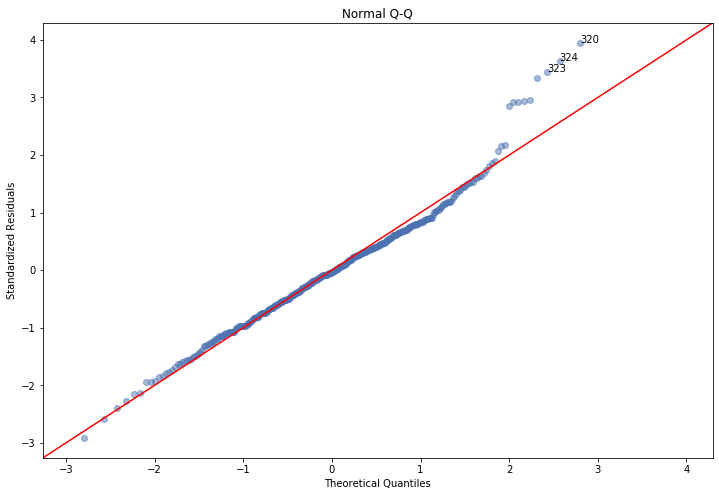

In [90]:
QQ = ProbPlot(model_norm_residuals)
plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

plot_lm_2.set_figheight(8)
plot_lm_2.set_figwidth(12)

plot_lm_2.axes[0].set_title('Normal Q-Q')
plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
plot_lm_2.axes[0].set_ylabel('Standardized Residuals');

# annotations
abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

for r, i in enumerate(abs_norm_resid_top_3):
    plot_lm_2.axes[0].annotate(i, 
                               xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                   model_norm_residuals[i]))

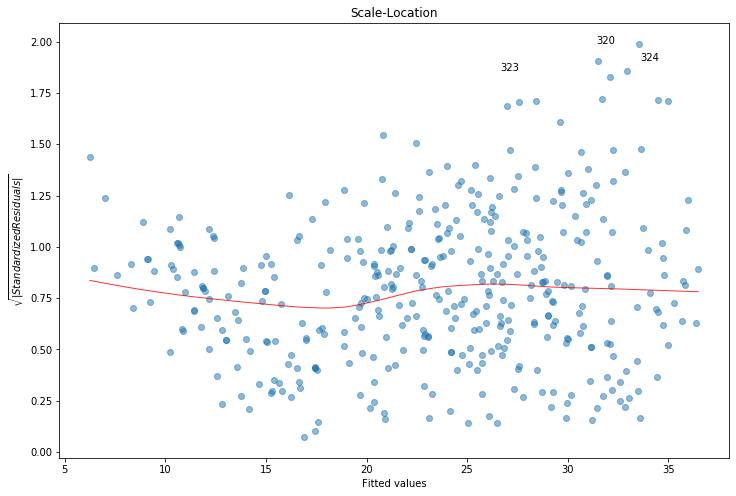

In [91]:
plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)

plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

# annotations
abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]

for i in abs_norm_resid_top_3:
    plot_lm_3.axes[0].annotate(i, 
                               xy=(model_fitted_y[i], 
                                   model_norm_residuals_abs_sqrt[i]))

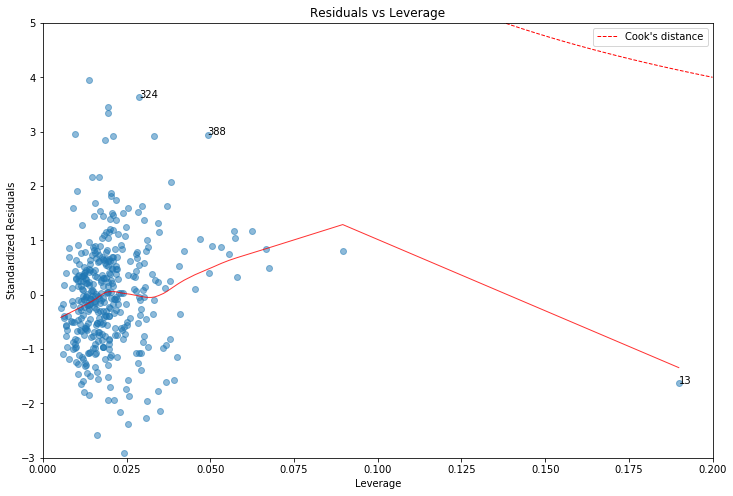

In [92]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))
    
# shenanigans for cook's distance contours
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance') # 0.5 line
graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50)) # 1 line
plt.legend(loc='upper right')

Right away we see a concerning pattern of the residuals. There is a slight pattern which suggests
non-linearity problem.  
Second, point 13 appears to be a high leverage point which should be remove and examine in future
analysis

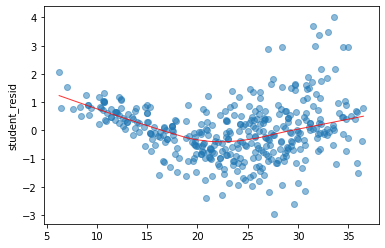

In [93]:
student_resid = model_fit.outlier_test()['student_resid']
plt.scatter(model_fitted_y, student_resid, alpha=0.5)
sns.regplot(model_fitted_y, student_resid, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

Lastly, there are some observations with >3 studentized residuals which can be marked as outliers.

(e) Lets revisit the correlation plot for a moment.

In [94]:
# Compute the correlation matrix
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


Choosing which interaction term to include is hard and prone to millions of mistakes. Nevertheless,
I will start with common sense. The top correlated pairs should be the first to include.

Right away displacement is highly correlated with weight and cylinders. Lets test them out.

In [95]:
mod = smf.ols('mpg~displacement*cylinders + displacement*weight', data=auto)
reg = mod.fit()
reg.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,52.6234,2.237,23.519,0.000,48.224,57.023
displacement,-0.0735,0.017,-4.403,0.000,-0.106,-0.041
cylinders,0.7606,0.767,0.992,0.322,-0.747,2.269
displacement:cylinders,-0.0030,0.003,-0.872,0.384,-0.010,0.004
weight,-0.0099,0.001,-7.438,0.000,-0.013,-0.007
displacement:weight,2.128e-05,5e-06,4.254,0.000,1.14e-05,3.11e-05


Easy enough, we can see that displacement*weight is statistically significant while disp*cylinders
is not. While I tried to also use weight*cylinders and weight*horsepower, the interaction terms
appear to capture all the information instead of the statistically significant term weight!

(f) Transforming a variable can it more normal distributed which is the first assumption of the 
linear regression. Secondly, transforming a variable can uncover a higher degree relationship.

Lets start with some common variable. We can see that mpg is a bit skewed on the right. Thus, we 
replace mpg with log(mpg). Second, high acceleration is bad for fuel economy and thus we will
include acceleration**2. Third, square root cylinders is also a good fit since sqrt is usually used
on counting variable. 

In [96]:
form = 'np.log(mpg) ~ np.power(acceleration, 2) + np.sqrt(cylinders) + weight + displacement + year + origin'
mod = smf.ols(form, data=auto)
reg = mod.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     459.9
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          3.89e-172
Time:                        23:07:08   Log-Likelihood:                 278.74
No. Observations:                 392   AIC:                            -543.5
Df Residuals:                     385   BIC:                            -515.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     1.7009      0.167     10.172      0.000       1.372       2.030
np.power(acceleration, 2)     0.0002   8.31e-05      2.395      0.017    3.56e-05       0.000
np.sqrt(cylinders)           -0.1170      0.054     -2.177      0.030      -0.223      -0.011
weight                       -0.0003   2.07e-05    -13.904      0.000      -0.000      -0.000
displacement                  0.0004      0.000      1.709      0.088   -6.43e-05       0.001
year                          0.0308      0.002     17.207      0.000       0.027       0.034
origin                        0.0335      0.010      3.458      0.001       0.014       0.053
==============================================================================
Omnibus:                        8.945   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               11.364
Skew:                          -0.218   Prob(JB):                      0.00341
Kurtosis:                       3.712   Cond. No.                     8.71e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Unfortunately, while most of our transformed variables are statistically significant, they do not
have a near zero p value. Moreover, the condition numer is large which suggest multicollinearity.

A better approach would be transform only mpg, weight, year and origin

In [5]:
form = 'np.log(mpg) ~ np.sqrt(weight)+ np.power(year,2) + origin'
mod = smf.ols(form, data=auto)
reg = mod.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     958.8
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          5.35e-179
Time:                        23:12:42   Log-Likelihood:                 284.56
No. Observations:                 392   AIC:                            -561.1
Df Residuals:                     388   BIC:                            -545.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.6145      0.100     36.297      0.000       3.419       3.810
np.sqrt(weight)      -0.0328      0.001    -32.851      0.000      -0.035      -0.031
np.power(year, 2)     0.0002   1.11e-05     18.943      0.000       0.000       0.000
origin                0.0230      0.009      2.496      0.013       0.005       0.041
==============================================================================
Omnibus:                       10.347   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               17.691
Skew:                          -0.114   Prob(JB):                     0.000144
Kurtosis:                       4.015   Cond. No.                     9.75e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.75e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

While we still have multicollinearity problem, we have a much better model for inference with
respectable adjusted R-square of 0.88.

Some diagnostic plots

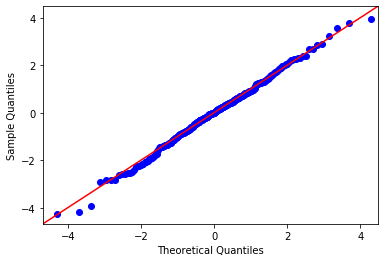

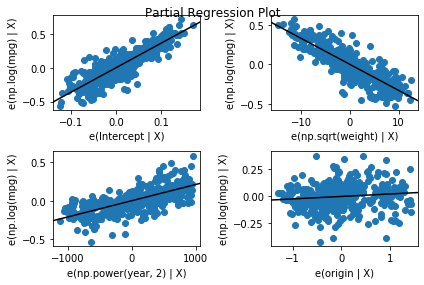

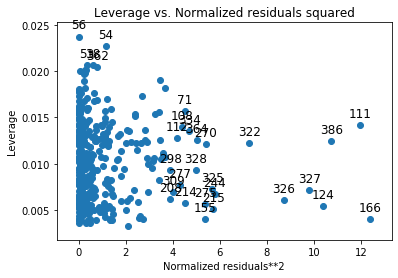

In [13]:
import scipy.stats as stats
from statsmodels.graphics.regressionplots import plot_partregress_grid
from statsmodels.graphics.regressionplots import plot_leverage_resid2
res = reg.resid # residuals
fig = sm.qqplot(res, stats.t, fit=True, line='45')

fig2 = plot_partregress_grid(reg)
fig3 = plot_leverage_resid2(reg)